In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.animation import PillowWriter


In [14]:
# === Load and prepare data ===
log_file_path = 'hxx.log'
df_log = pd.read_csv(log_file_path)


In [15]:
# Clip time range for true path
start_time = df_log['time'].iloc[0] + 70
end_time = start_time + 30
df_clipped = df_log[(df_log['time'] >= start_time) & (df_log['time'] <= end_time)].reset_index(drop=True)

# Apply skip factor
skip_factor = 10
df_clipped = df_clipped.iloc[::skip_factor].reset_index(drop=True)

# Adjust battery offset
battery_adj = df_clipped['z'].min() - df_clipped['z_ref'].min()

# Extract data
time_vals = df_clipped['time'].values
x = df_clipped['x'].values
y = df_clipped['y'].values
z = (df_clipped['z'] - battery_adj).values


In [10]:
# Clip time range for the reference path
start_time = df_log['time'].iloc[0] + 70 - 0.8
end_time = start_time + 15 + 0.8
df_clipped_ref = df_log[(df_log['time'] >= start_time) & (df_log['time'] <= end_time)].reset_index(drop=True)
 
x_ref = df_clipped_ref['x_ref'].values
y_ref = df_clipped_ref['y_ref'].values
z_ref = df_clipped_ref['z_ref'].values


# Clip time range for black dot path
start_time = df_log['time'].iloc[0] + 70 - 0.6
end_time = start_time + 30 + 0.6
df_clipped_black_dot = df_log[(df_log['time'] >= start_time) & (df_log['time'] <= end_time)].reset_index(drop=True)
 
x_ref_blackdot = df_clipped_black_dot['x_ref'].values
y_ref_blackdot = df_clipped_black_dot['y_ref'].values
z_ref_blackdot = df_clipped_black_dot['z_ref'].values

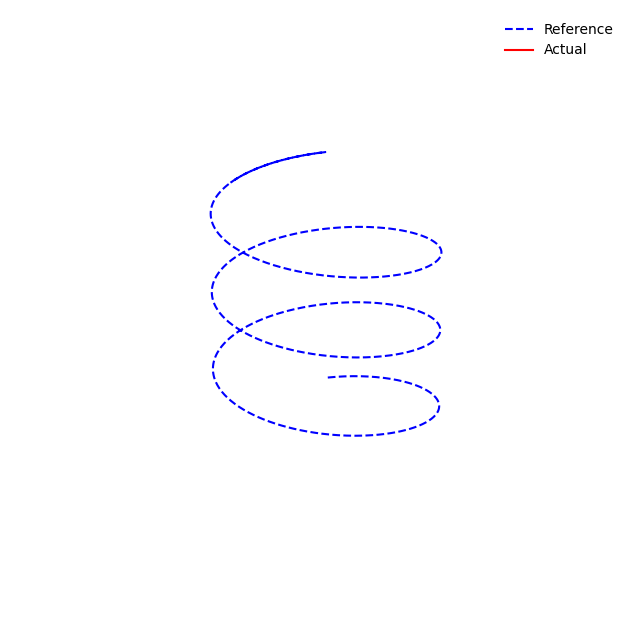

In [11]:
# Create figure with transparent background
fig = plt.figure(facecolor='none', figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d', facecolor='none')

# Make all axes panes completely transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Remove all axis lines and ticks
ax.set_axis_off()  # This turns off all axes elements at once

# Alternative if you want to keep axes but make them transparent:
# ax.grid(False)
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])
# 
# # Make axis lines transparent
# ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Remove pane borders completely
ax.xaxis.pane.set_edgecolor('none')
ax.yaxis.pane.set_edgecolor('none')
ax.zaxis.pane.set_edgecolor('none')

# Set equal aspect ratio
ax.set_box_aspect([1, 1, 1])

# Add your plot elements (these will remain visible)
ax.plot3D(-x_ref, y_ref, -z_ref, 'b--', label='Reference')
trace, = ax.plot([], [], [], 'r-', label='Actual')
ax.legend(frameon=False)  # Legend with transparent background

# Set viewing angle
ax.view_init(elev=23, azim=0)
ax.dist = 14  # Adjust distance from the viewer
ax.set_proj_type('persp')

In [17]:
# Add black dot for animated reference
ref_dot, = ax.plot([], [], [], 'ko', markersize=5, label='Reference Dot')  # small black circle

def init():
    trace.set_data(x[:0], y[:0])
    trace.set_3d_properties(-z[:0])
    ref_dot.set_data(np.array([]), np.array([]))
    ref_dot.set_3d_properties(np.array([]))
    return trace, ref_dot


def update(frame):
    # trace_x.append(x[frame])
    # trace_y.append(-y[frame])
    # trace_z.append(-z[frame])

    # trace.set_data(np.array(trace_x), np.array(trace_y))
    # trace.set_3d_properties(np.array(trace_z))

    # if frame < len(x_ref_blackdot):
    #     ref_dot.set_data(-x_ref_blackdot[frame], y_ref_blackdot[frame])
    #     ref_dot.set_3d_properties(-z_ref_blackdot[frame])
    return trace, ref_dot

# Create animation
ani = animation.FuncAnimation(
    fig, update, frames=len(x),
    init_func=init, blit=False, interval=interval_ms, repeat=False
)



In [ ]:
# Save and optionally render
# ani.save("trajectory2.gif", writer=PillowWriter(fps=1000 // interval_ms))
# HTML(ani.to_jshtml())
# ani.save("trajectory.mp4", writer='ffmpeg', fps=1000 // interval_ms)



In [ ]:
# ani.save("trajectory.mov", writer='ffmpeg', fps=1000 // interval_ms,
#          extra_args=['-vcodec', 'qtrle'])  # qtrle supports alpha in .mov


In [ ]:
# # === Save PNG frames manually with transparent background ===
# import os
# os.makedirs("frames", exist_ok=True)

# # Re-initialize before frame-by-frame saving
# init()

# for i in range(len(x)):
#     update(i)
#     fig.savefig(f"frames/frame_{i:04d}.png", dpi=200, transparent=True)


In [ ]:
# # === Save PNG frames manually with transparent background ===
# import os
# os.makedirs("frames", exist_ok=True)

# # Re-initialize the figure
# init()

# for i in range(len(x)):
#     update(i)
#     fig.savefig(f"frames/frame_{i:04d}.png", dpi=200, transparent=True, facecolor='none')


In [ ]:
# ani.save("frames/frame_%04d.png", dpi=200, savefig_kwargs={'transparent': True})


In [16]:
fps = len(x) / 30  # For 30 seconds
interval_ms = 1000 / fps  # milliseconds between frames for animation


In [ ]:
fps

6.033333333333333

In [19]:
# === Save PNG frames manually with transparent background ===
import os
os.makedirs("framesx", exist_ok=True)

# Re-initialize the figure
init()

for i in range(len(x)):
    update(i)
    fig.savefig(f"frames_x/frame_{i:04d}.png", dpi=200, transparent=True, facecolor='none')


FileNotFoundError: [Errno 2] No such file or directory: 'frames_x/frame_0000.png'